In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point
from scipy.interpolate import griddata
from matplotlib.path import Path
import gymnasium as gym
import quake_envs
from quake_envs.simulations.utils import *

In [2]:
env = gym.make("quake-res-30-v1").unwrapped
center = env.resilience.simulation.center
longitude, latitude = center.x, center.y

vs30_map = gpd.read_file(PathUtils.shear_wave_velocity)
pga_map = gpd.read_file(PathUtils.pga_map)
sa03_map = gpd.read_file(PathUtils.sa03_map)
sa10_map = gpd.read_file(PathUtils.sa10_map)
faults = gpd.read_file(PathUtils.active_faults_shp)

In [11]:
import geopandas as gpd
from shapely.geometry import Point


pga_map = sa03_map
# Make sure center is a shapely Point
# center = Point(longitude, latitude)  # If center is not already a Point

# Ensure CRS match: reproject pga_map to EPSG:4326 if center is lon/lat
if pga_map.crs.to_epsg() != 4326:
    pga_map = pga_map.to_crs(epsg=4326)

# Now find the closest row in pga_map to center
pga_map['dist'] = pga_map.geometry.distance(center)

closest_row = pga_map.loc[pga_map['dist'].idxmin()]


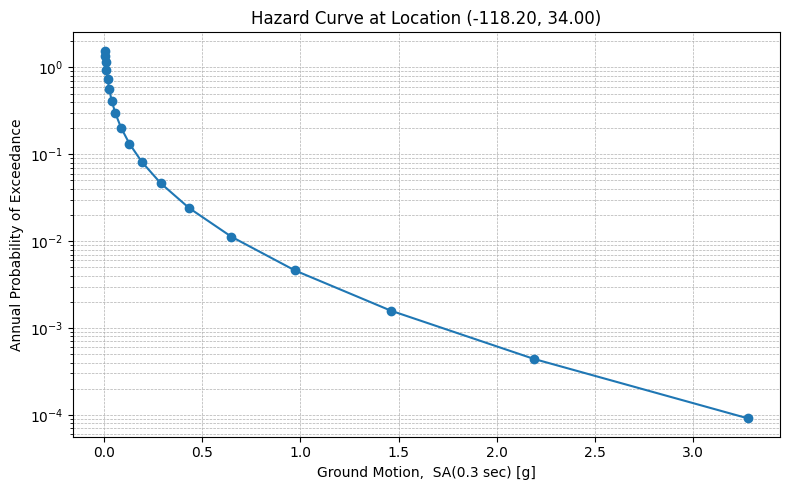

In [ ]:
from quake_envs.simulations.psha import plot_hazard_curve


plot_hazard_curve(row=closest_row, im_type="SA(0.3 sec) [g]")
